<a href="https://colab.research.google.com/github/sojiro-otsubo/Corporacin-Favorita-Grocery-Sales-Forecasting/blob/master/make_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import datetime
customers = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dynamic_pricing/data/customers.xlsx', index_col=0)
customers = customers.set_index('Unnamed: 1', append=True)
customers = customers.rename(columns= lambda x: datetime.date(x.year, x.month, x.day),copy=False)


In [4]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.3 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c1c9d90d10e5af5f6466399e32516bf70cfa68366bbd4abc54a09217bbb87056
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib 
japanize_matplotlib.japanize()
plt.style.use('ggplot')

Text(0.5, 1.0, 'デザ－ト:赤, パン・軽食:緑, 和風素材:青')

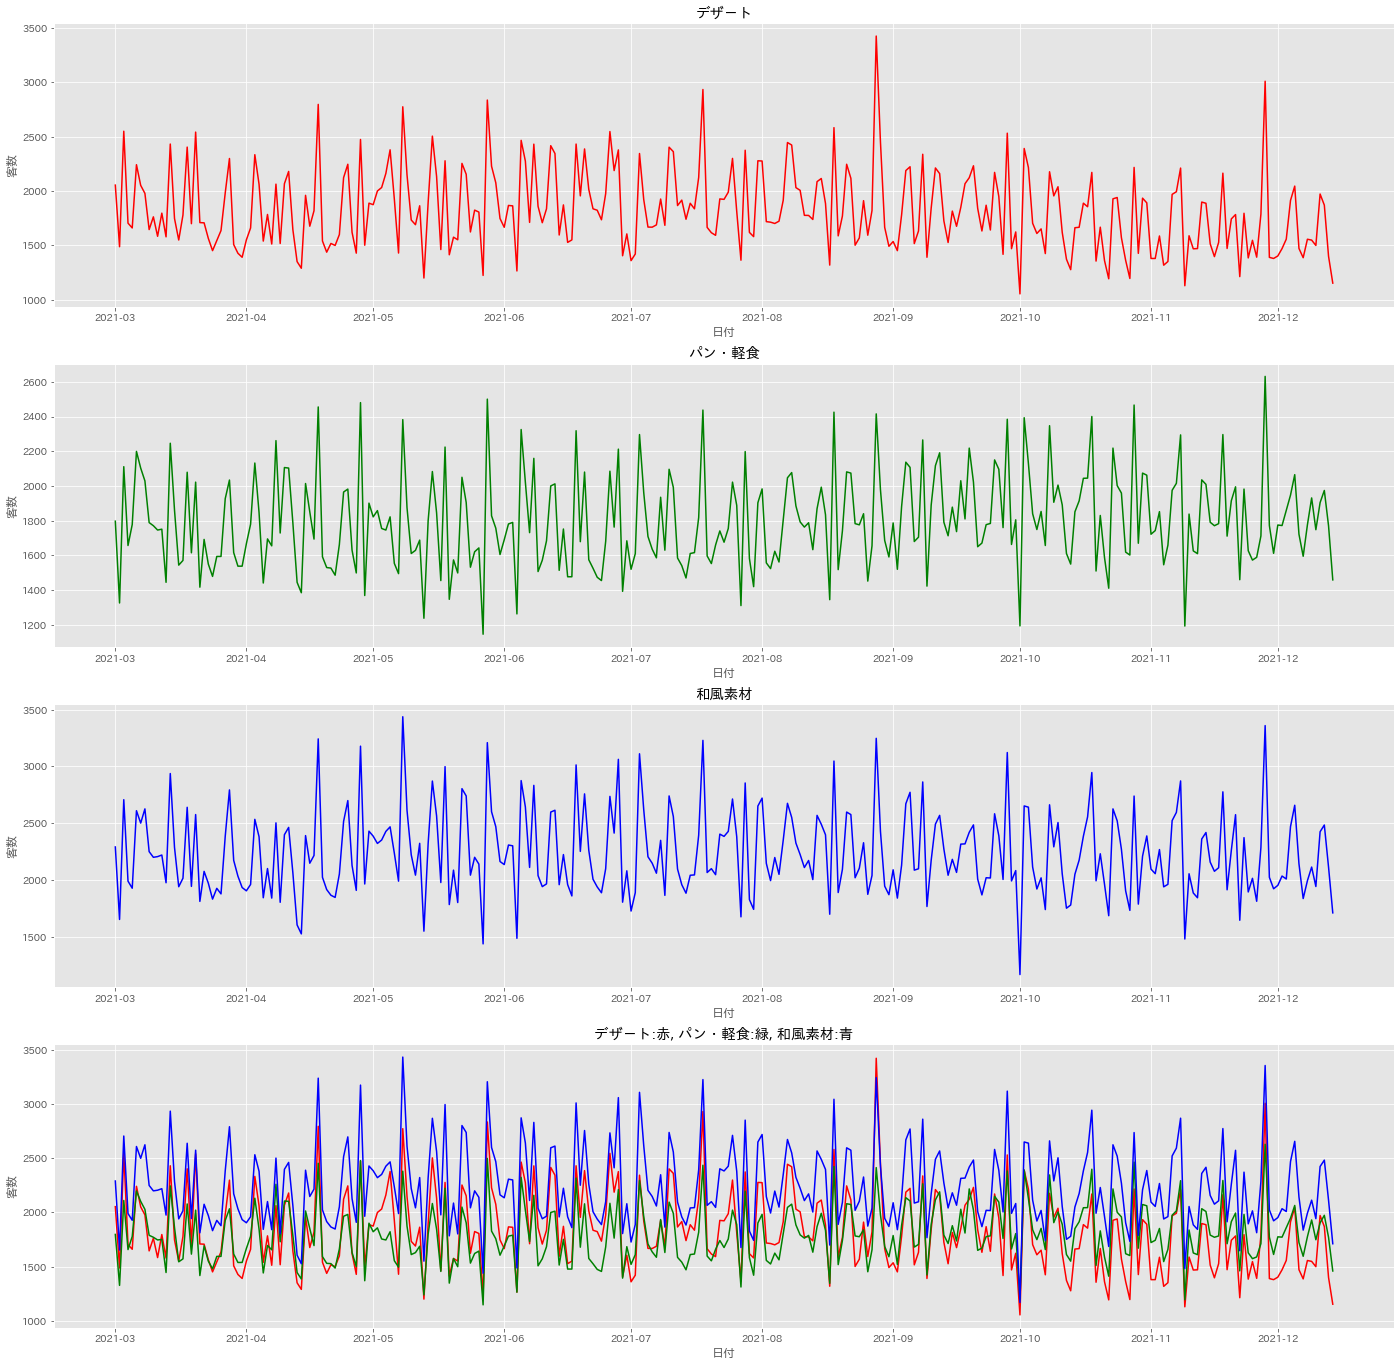

In [6]:
ax_h_w = (4,1) # 表示するグラフ(行×列)
ratio = 12
fig1 = plt.figure(figsize=(ax_h_w[1]*ratio*2, ax_h_w[0]*ratio//2)) # ax_h_wの縦横日と逆にすることで

###########
ax1 = fig1.add_subplot(*ax_h_w, 1)
ax1.plot(customers.loc[('デイリー食品', 'デザ－ト')], color='red')
ax1.set_xlabel('日付')
ax1.set_ylabel('客数')
ax1.set_title('デザ－ト')
###########

###########
ax2 = fig1.add_subplot(*ax_h_w, 2)
ax2.plot(customers.loc[('デイリー食品', 'パン・軽食')], color='green')
ax2.set_xlabel('日付')
ax2.set_ylabel('客数')
ax2.set_title('パン・軽食')
###########

###########
ax3 = fig1.add_subplot(*ax_h_w, 3)
ax3.plot(customers.loc[('デイリー食品', '和風素材')], color='blue')
ax3.set_xlabel('日付')
ax3.set_ylabel('客数')
ax3.set_title('和風素材')
###########

###########
ax4 = fig1.add_subplot(*ax_h_w, 4)

ax4.plot(customers.loc[('デイリー食品', 'デザ－ト')], color='red')
ax4.plot(customers.loc[('デイリー食品', 'パン・軽食')], color='green')
ax4.plot(customers.loc[('デイリー食品', '和風素材')], color='blue')

ax4.set_xlabel('日付')
ax4.set_ylabel('客数')
ax4.set_title('デザ－ト:赤, パン・軽食:緑, 和風素材:青')
###########

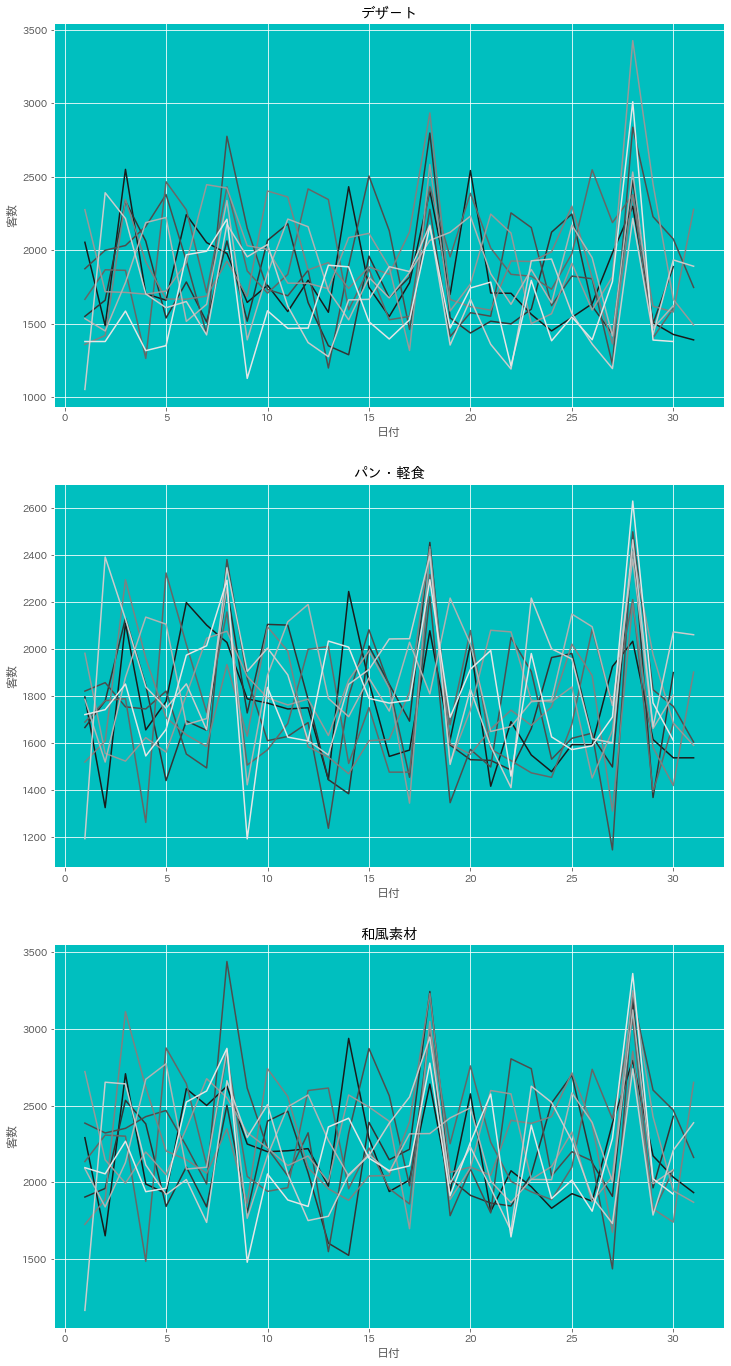

In [7]:
ax_h_w = (3,1) # 表示するグラフ(行×列)
ratio = 8
fig1 = plt.figure(figsize=(ax_h_w[1]*ratio*1.5, ax_h_w[0]*ratio)) # ax_h_wの縦横逆

###########
ax1 = fig1.add_subplot(*ax_h_w, 1)
# データの数は3月から11月までの9ヶ月間
for i in range(9):
  start = datetime.date(2021, i+3, 1)
  end = datetime.date(2021, i+4, 1) - datetime.timedelta(days=1)
  df = customers.loc[('デイリー食品', 'デザ－ト'), start:end]
  df.rename(index=lambda x: x.day, inplace=True)
  ax1.plot(df, color=str(0.1*(i+1)))


ax1.set_xlabel('日付')
ax1.set_ylabel('客数')
ax1.set_title('デザ－ト')
ax1.set_facecolor('c')
###########

###########
ax2 = fig1.add_subplot(*ax_h_w, 2)
# データの数は3月から11月までの9ヶ月間
for i in range(9):
  start = datetime.date(2021, i+3, 1)
  end = datetime.date(2021, i+4, 1) - datetime.timedelta(days=1)
  df = customers.loc[('デイリー食品', 'パン・軽食'), start:end]
  df.rename(index=lambda x: x.day, inplace=True)
  ax2.plot(df, color=str(0.1*(i+1)))


ax2.set_xlabel('日付')
ax2.set_ylabel('客数')
ax2.set_title('パン・軽食')
ax2.set_facecolor('c')
###########

###########
ax3 = fig1.add_subplot(*ax_h_w, 3)
# データの数は3月から11月までの9ヶ月間
for i in range(9):
  start = datetime.date(2021, i+3, 1)
  end = datetime.date(2021, i+4, 1) - datetime.timedelta(days=1)
  df = customers.loc[('デイリー食品', '和風素材'), start:end]
  df.rename(index=lambda x: x.day, inplace=True)
  ax3.plot(df, color=str(0.1*(i+1)))

ax3.set_xlabel('日付')
ax3.set_ylabel('客数')
ax3.set_title('和風素材')
ax3.set_facecolor('c')
###########

Text(0.5, 1.0, '和風素材')

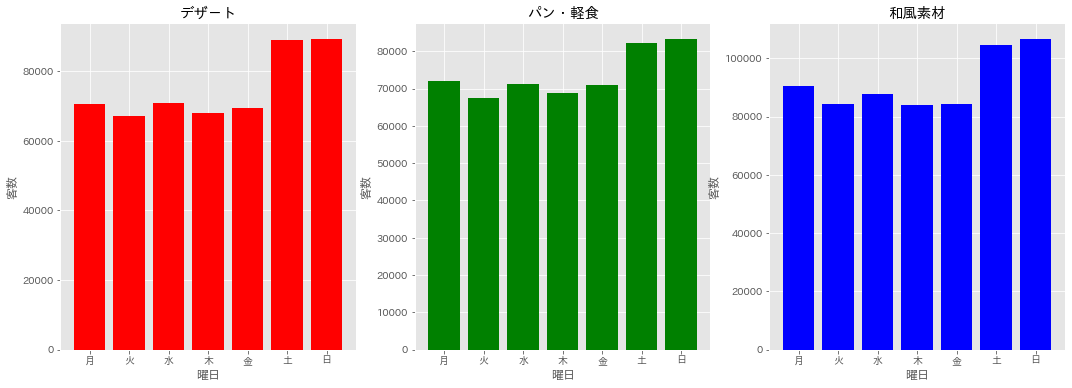

In [8]:
def sum_of_week(df):
  df = pd.DataFrame(df).set_axis(['contents'], axis=1)
  week_of_day = {"月":0, "火":0, "水":0, "木":0, "金":0, "土":0, "日":0}
  week = ["月", "火", "水", "木", "金", "土", "日"]
  for day in df.index:
    if day == datetime.date(2021, 12, 13):
      break # 月から日までを同じ回数だけ合計するように微調整
    week_of_day[week[day.weekday()]] += max(0, df.loc[day,"contents"])
  
  return week_of_day

ax_h_w = (1,3) # 表示するグラフ(行×列)
ratio = 6
fig1 = plt.figure(figsize=(ax_h_w[1]*ratio, ax_h_w[0]*ratio)) # ax_h_wの縦横日と逆にすることで

###########
ax1 = fig1.add_subplot(*ax_h_w, 1)
x, y = zip(*sum_of_week(customers.loc[('デイリー食品', 'デザ－ト')]).items()) 
ax1.bar(x, y, color='red')
ax1.set_xlabel('曜日')
ax1.set_ylabel('客数')
ax1.set_title('デザ－ト')
###########

###########
ax2 = fig1.add_subplot(*ax_h_w, 2)
x, y = zip(*sum_of_week(customers.loc[('デイリー食品', 'パン・軽食')]).items()) 
ax2.bar(x, y, color='green')
ax2.set_xlabel('曜日')
ax2.set_ylabel('客数')
ax2.set_title('パン・軽食')
###########

###########
ax3 = fig1.add_subplot(*ax_h_w, 3)
x, y = zip(*sum_of_week(customers.loc[('デイリー食品', '和風素材')]).items()) 
ax3.bar(x, y, color='blue')
ax3.set_xlabel('曜日')
ax3.set_ylabel('客数')
ax3.set_title('和風素材')
###########

Text(0.5, 1.0, '和風素材')

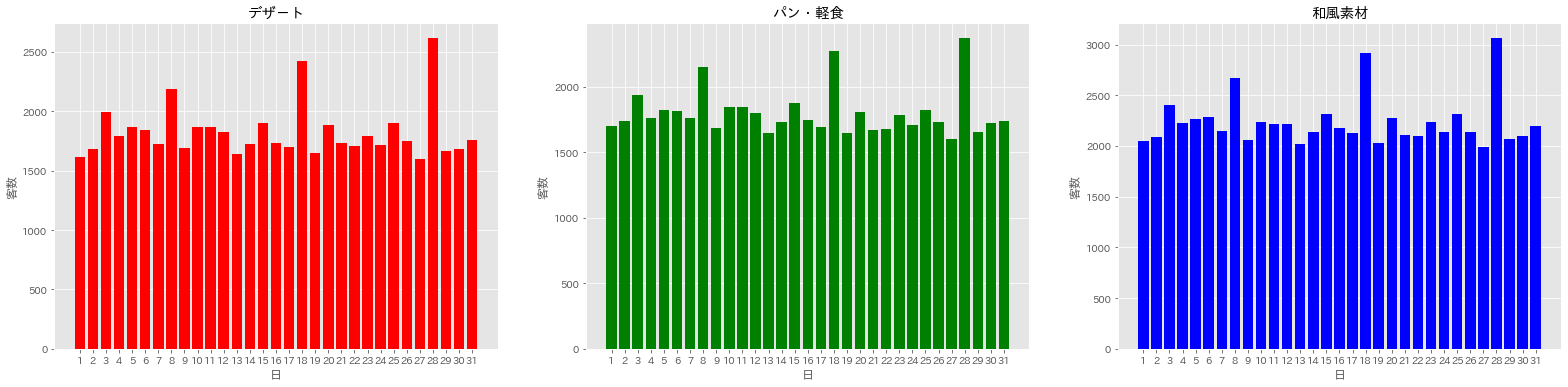

In [43]:
from collections import defaultdict

def mean_of_month(df):
  df = pd.DataFrame(df).set_axis(['contents'], axis=1)
  month_of_day = defaultdict(lambda: 0)
  month_of_day_num = defaultdict(lambda: 0)
  month_of_day_mean = defaultdict(lambda: 0)
  for day in df.index:
    if day == datetime.date(2021, 12, 15):
      break 
    month_of_day[str(day.day)] += df.loc[day,"contents"]
    month_of_day_num[str(day.day)] += 1
  
  for day_index in month_of_day:
    month_of_day_mean[day_index] = month_of_day[day_index] / month_of_day_num[day_index]

  return month_of_day_mean

ax_h_w = (1,3) # 表示するグラフ(行×列)
ratio = 6
fig1 = plt.figure(figsize=(ax_h_w[1]*ratio*1.5, ax_h_w[0]*ratio)) # ax_h_wの縦横日と逆にすることで

###########
ax1 = fig1.add_subplot(*ax_h_w, 1)
x, y = zip(*mean_of_month(customers.loc[('デイリー食品', 'デザ－ト')]).items()) 
ax1.bar(x, y, color='red')
ax1.set_xlabel('日')
ax1.set_ylabel('客数')
ax1.set_title('デザ－ト')
###########

###########
ax2 = fig1.add_subplot(*ax_h_w, 2)
x, y = zip(*mean_of_month(customers.loc[('デイリー食品', 'パン・軽食')]).items()) 
ax2.bar(x, y, color='green')
ax2.set_xlabel('日')
ax2.set_ylabel('客数')
ax2.set_title('パン・軽食')
###########

###########
ax3 = fig1.add_subplot(*ax_h_w, 3)
x, y = zip(*mean_of_month(customers.loc[('デイリー食品', '和風素材')]).items()) 
ax3.bar(x, y, color='blue')
ax3.set_xlabel('日')
ax3.set_ylabel('客数')
ax3.set_title('和風素材')
###########

Text(0.5, 1.0, '和風素材')

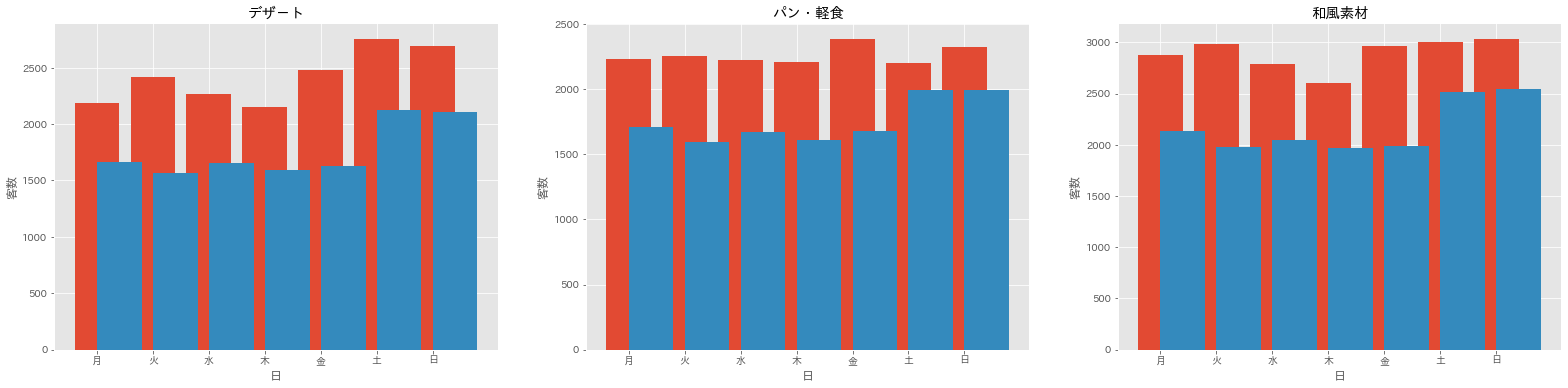

In [51]:
# 8の付く日以外の各曜日の平均と8の付く日の各曜日の平均を求める
def mean_of_week(df):
  df = pd.DataFrame(df).set_axis(['contents'], axis=1)
  week_of_day_sum = [0] * 7
  week_of_day_num = [0] * 7
  week_of_day_mean = [0] * 7
  week_of_day_sum8 = [0] * 7
  week_of_day_num8 = [0] * 7
  week_of_day_mean8 = [0] * 7
  
  for day in df.index:
    if day == datetime.date(2021, 12, 15): # 平均を求めるのでバラツキが出てもいい
      break
    if str(day.day)[-1] == '8':
      week_of_day_sum[day.weekday()] += df.loc[day,"contents"]
      week_of_day_num[day.weekday()] += 1
    else:
      week_of_day_sum8[day.weekday()] += df.loc[day,"contents"]
      week_of_day_num8[day.weekday()] += 1
  
  for day in range(7): 
    week_of_day_mean[day] = week_of_day_sum[day] / week_of_day_num[day]
    week_of_day_mean8[day] = week_of_day_sum8[day] / week_of_day_num8[day]

  return week_of_day_mean, week_of_day_mean8

ax_h_w = (1,3) # 表示するグラフ(行×列)
ratio = 6
fig1 = plt.figure(figsize=(ax_h_w[1]*ratio*1.5, ax_h_w[0]*ratio)) # ax_h_wの縦横日と逆にすることで
week = ["月", "火", "水", "木", "金", "土", "日"]

###########
ax1 = fig1.add_subplot(*ax_h_w, 1)
mean, mean8 = mean_of_week(customers.loc[('デイリー食品', 'デザ－ト')])
ax1.bar(week, mean)
ax1.bar(week, mean8,align="edge")
ax1.set_xlabel('日')
ax1.set_ylabel('客数')
ax1.set_title('デザ－ト')
###########

###########
ax2 = fig1.add_subplot(*ax_h_w, 2)
mean, mean8 = mean_of_week(customers.loc[('デイリー食品', 'パン・軽食')])
ax2.bar(week, mean)
ax2.bar(week, mean8,align="edge")
ax2.set_xlabel('日')
ax2.set_ylabel('客数')
ax2.set_title('パン・軽食')
###########

###########
ax3 = fig1.add_subplot(*ax_h_w, 3)
mean, mean8 = mean_of_week(customers.loc[('デイリー食品', '和風素材')])
ax3.bar(week, mean)
ax3.bar(week, mean8,align="edge")
ax3.set_xlabel('日')
ax3.set_ylabel('客数')
ax3.set_title('和風素材')
###########